In [2]:
from pauls_functions_advanced import *
import pandas as pd
from sklearn.model_selection import train_test_split
from interpretableai import iai
from sklearn.metrics import accuracy_score
from pauls_functions_advanced import *
from joblib import Parallel, delayed
from scipy.stats import bernoulli
from sklearn.linear_model import LinearRegression

In [3]:
names = ['Reg-CART','CART','ORT','OCT','ORT-H','OCT-H']

iters = 50

accuracies = {i: {} for i in range(iters)}

for i in range(iters):

    ## Create artificial data set with
    n = 2000
    x1 = np.random.normal(loc = 0,scale=1, size=n)
    x2 = np.random.normal(loc=0, scale=1, size=n)
    x3 = np.random.normal(loc=0, scale=1, size=n)
    x4 = np.random.normal(loc=0, scale=1, size=n)
    x5 = np.random.normal(loc = 0,scale=1, size=n)
    x6 = np.random.normal(loc=0, scale=1, size=n)
    x7 = np.random.normal(loc=0, scale=1, size=n)
    x8 = np.random.normal(loc=0, scale=1, size=n)
    
    deterministic = (x1 < -0.1) * (x2 > -0.5)* (x3 < -1) + (x4 < 0.5) * (x5 < 0.7)* (x6 > -0.8) * (x7 > -0.5)

    y = deterministic + np.random.normal(0, 0.1, size = n)

    simulated_data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 
                                    'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8,
                                    'y': y, 'y_bar': deterministic})

    features = simulated_data[[f'x{i}' for i in range(1, 9)]]
    diagnosis = simulated_data['y']
    orig_cols = simulated_data.columns

    X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size = 0.2, random_state=i)

    models, performance = generate_tree(X_train, y_train, X_test, y_test, 
                                        n_num=2, feat_size=8,  max_iter_hy=2, 
                                        depth_bi=3, depth_hy=3, complexity_bi=0.001, 
                                        complexity_hy=0.001, depth_grid_bi=False, depth_grid_hy=False, 
                                        Reg_CART=True, ORT=True, ORT_H=False, 
                                        Clas_CART=False, OCT=False, OCT_H=False)
    
    act_name = []
    act_rules = []
    for model,name in zip(models,names):
        if not not model:
            act_name += [name]
            act_rules += [model]

    datasets = gen_train_and_test_features(act_rules, act_name, X_train, X_test)

    log_reg_acc = linear_regression_pipeline(X_train, X_test, y_train, y_test)

    accuracies[i]["Linear Regression"] = log_reg_acc
    accuracies[i]["Reg CART"] = performance['Reg CART'].iloc[0]
    accuracies[i]["ORT"] = performance['ORT'].iloc[0]

    for model in datasets.keys():

        X_train_rules_and_features, X_test_rules_and_features = datasets[model][0]
        X_train_only_rules, X_test_only_rules = datasets[model][1]

        only_rules_acc = linear_regression_pipeline(X_train_only_rules, X_test_only_rules, y_train, y_test)

        rules_and_features_acc = linear_regression_pipeline(X_train_rules_and_features, X_test_rules_and_features, y_train, y_test)

        accuracies[i][model + "_rules_and_features"] = rules_and_features_acc
    
    accuracies[i]["True Model"] = r2_score(y_test, simulated_data.loc[y_test.index, "y_bar"])



    ----------------------------------------- section 1 -----------------------------------------


[ Warning: This copy of Interpretable AI software is for academic purposes only and not for commercial use.


Regression CART mean performance:  0.5782840367173858


Regression ORT performance:  0.5981196066074157




    ----------------------------------------- section 2 -----------------------------------------
Regression CART mean performance:  0.5782840367173858


Regression ORT performance:  0.5981196066074157




    ----------------------------------------- section 1 -----------------------------------------
Regression CART mean performance:  0.6341059225275711


Regression ORT performance:  0.588129355678694




    ----------------------------------------- section 2 -----------------------------------------
Regression CART mean performance:  0.6341059225275711


Regression ORT performance:  0.588129355678694




    ----------------------------------------- section 1 -----------------------------------------
Regression CART mean performance:  0.643175586473216


Regression ORT performance:  0.6522137683882921




    ----------------------------------------- section 2 ---------------

In [4]:
accuracies = pd.DataFrame(accuracies).T.rename(columns = {"CART_rules": "CART", "CART_rules_and_features": "RuleFit", "OCT_rules": "OCT", "OCT_rules_and_features": "ORRFA", "Logistic Regession": "Log. Regression"})

In [5]:
accuracies = accuracies.rename(columns = {"Logistic Regression": "Log. Regression"})

In [6]:
accuracies

,Linear Regression,Reg CART,ORT,Reg-CART_rules_and_features,ORT_rules_and_features,True Model
0,0.321898,0.578284,0.598120,0.638307,0.652756,0.954995
1,0.313126,0.634106,0.588129,0.678292,0.632748,0.958120
2,0.309154,0.643176,0.652214,0.678181,0.686637,0.958810
3,0.231469,0.495342,0.514527,0.583884,0.589902,0.951064
4,0.255184,0.705128,0.663604,0.733643,0.690682,0.954664
5,0.268225,0.658468,0.675541,0.689033,0.695360,0.951984
6,0.263181,0.579797,0.608200,0.623249,0.657769,0.954608
7,0.312513,0.644215,0.651458,0.684332,0.692047,0.957051
8,0.323152,0.610061,0.612554,0.662276,0.665458,0.955017
9,0.245611,0.606126,0.628660,0.645518,0.667640,0.956761


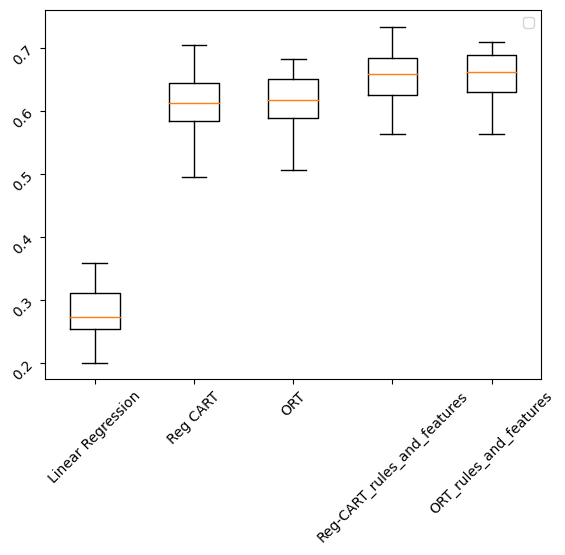

In [7]:
fig, ax = plt.subplots()


ax.boxplot(accuracies.iloc[:,:-1])
ax.set_xticklabels(accuracies.columns[:-1])

ax.legend()
ax.tick_params(rotation = 45)